# EV market segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the data**

In [2]:
df=pd.read_csv(r"C:\Users\HP\Desktop\ElectricCarData_Clean.csv")
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [3]:
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0,1],inplace=True)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,1,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,32997


**Information regarding type of data in each column**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    int64  
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 11.4+ KB


**Finding out the number of null values**

In [5]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

**Descriptive Statistics of the dataset**

In [6]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,RapidCharge,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,0.951456,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.215963,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,0.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,1.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,1.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,1.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,1.000000,7.000000,215000.000000


In [7]:
!pip install plotly==5.8.0
%matplotlib inline
from tqdm import tqdm
import statsmodels.api as sm
import plotly.express as px
!pip install kaleido==0.2.1
import kaleido
import plotly
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import KMeans,MeanShift,estimate_bandwidth
from sklearn.datasets import make_blobs
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer,InterclusterDistance
from collections import Counter
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score,silhouette_score,confusion_matrix,accuracy_score
pd.set_option("display.precision",3)
np.set_printoptions(precision=5,suppress=True)
pd.options.display.float_format='{:.4f}'.format
import plotly.io as pio
pio.renderers.default="browser"

In [9]:
fig=px.box(df,x='RapidCharge',y='PriceEuro',color='RapidCharge',points='all')
pio.show(fig)

**Pairplot of all the columns based on Rapid Charger presence**

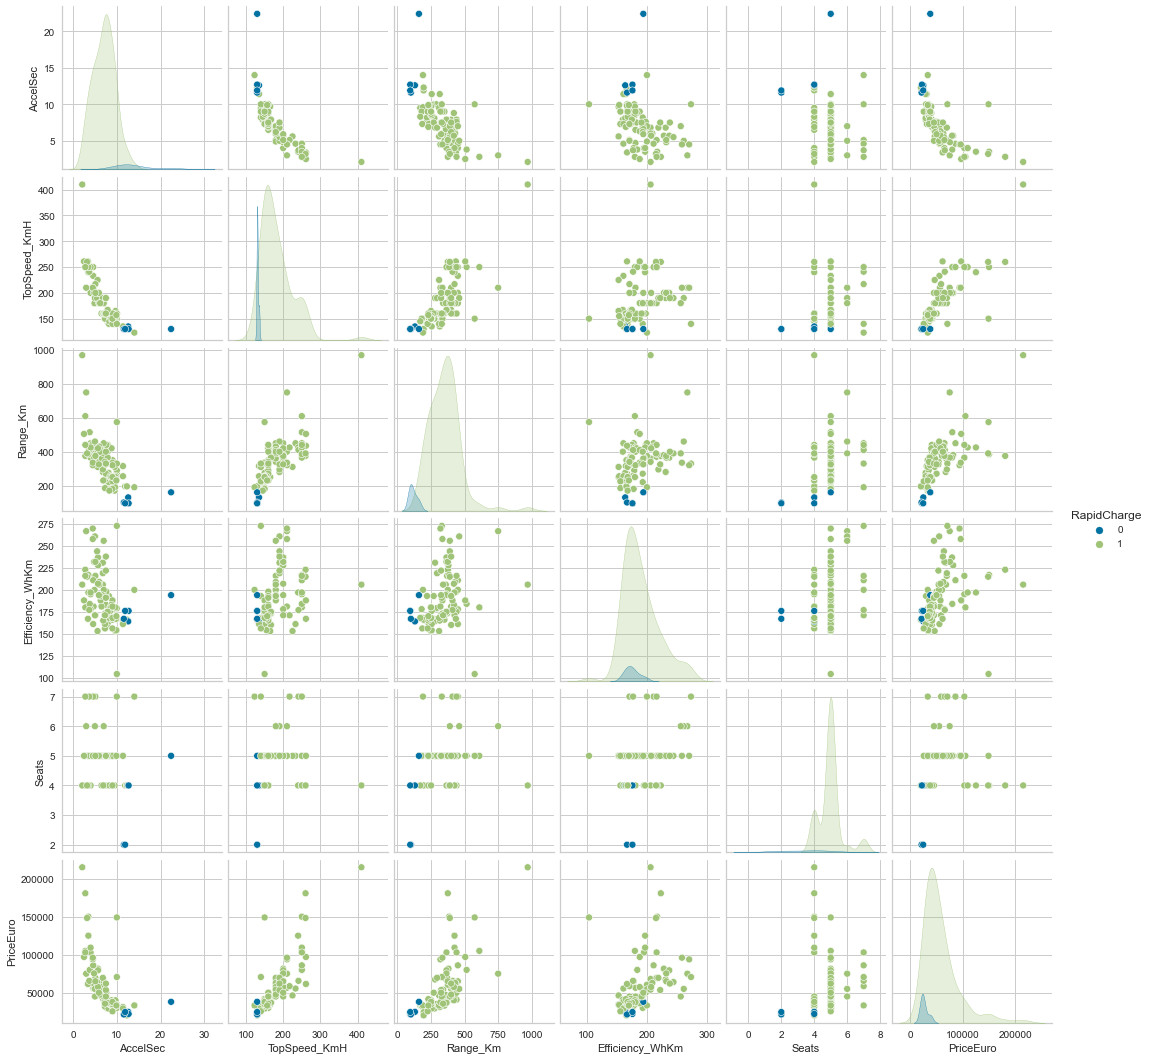

In [10]:
sns.pairplot(df,hue='RapidCharge')

**Heatmap to show the correlation of the data**

<AxesSubplot:>

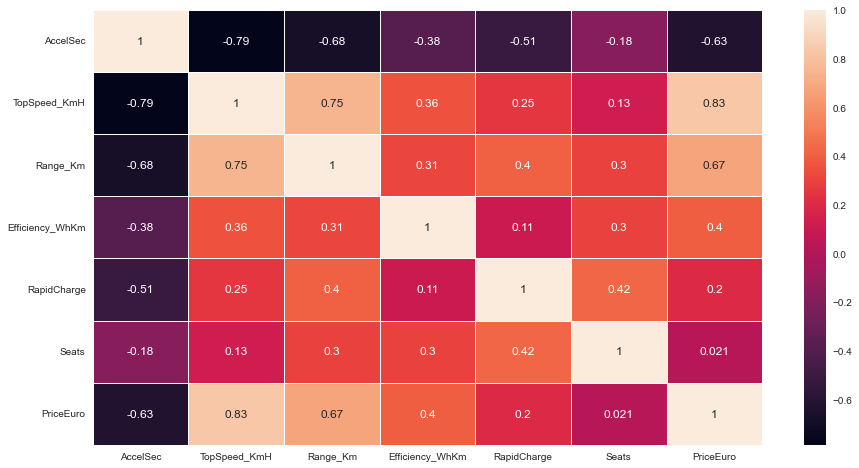

In [11]:
ax=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

**Frequency of brands in the dataset**

In [12]:
df['Brand'].value_counts()

Tesla          13
Audi            9
Nissan          8
Volkswagen      8
Skoda           6
Renault         5
Porsche         5
Kia             5
BMW             4
Ford            4
Smart           3
Byton           3
Mercedes        3
Hyundai         3
Opel            3
Fiat            2
Peugeot         2
Honda           2
Mini            1
DS              1
Polestar        1
Sono            1
Lucid           1
Jaguar          1
Citroen         1
Aiways          1
MG              1
Lightyear       1
SEAT            1
CUPRA           1
Lexus           1
Mazda           1
Volvo           1
Name: Brand, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Tesla '),
  Text(1, 0, 'Volkswagen '),
  Text(2, 0, 'Polestar '),
  Text(3, 0, 'BMW '),
  Text(4, 0, 'Honda '),
  Text(5, 0, 'Lucid '),
  Text(6, 0, 'Peugeot '),
  Text(7, 0, 'Audi '),
  Text(8, 0, 'Mercedes '),
  Text(9, 0, 'Nissan '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Porsche '),
  Text(12, 0, 'MG '),
  Text(13, 0, 'Mini '),
  Text(14, 0, 'Opel '),
  Text(15, 0, 'Skoda '),
  Text(16, 0, 'Volvo '),
  Text(17, 0, 'Kia '),
  Text(18, 0, 'Renault '),
  Text(19, 0, 'Mazda '),
  Text(20, 0, 'Lexus '),
  Text(21, 0, 'CUPRA '),
  Text(22, 0, 'SEAT '),
  Text(23, 0, 'Lightyear '),
  Text(24, 0, 'Aiways '),
  Text(25, 0, 'DS '),
  Text(26, 0, 'Citroen '),
  Text(27, 0, 'Jaguar '),
  Text(28, 0, 'Ford '),
  Text(29, 0, 'Byton '),
  Text(30, 0, 'Sono '),
  Text(31, 0, 'Smart '),
  Text(32, 0, 'Fiat ')])

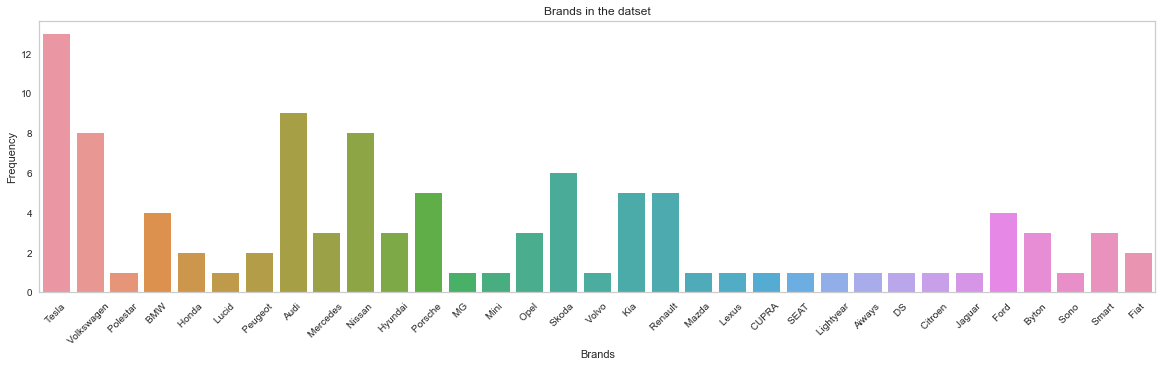

In [13]:
ax=plt.figure(figsize=(20,5))
sns.countplot(x=df['Brand'])
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

*Tesla, Audi and Nissan are the prominent brands in EV market while Lexus, Maxda and Volvo being the least*

**Top speeds achieved by cars of a brand**

In [14]:
dt=df.groupby('Brand').max()
dt

,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Brand,,,,,,,,,,,,,
Aiways,U5,9.0000,150,335,188,350,1,FWD,Type 2 CCS,SUV,C,5,36057
Audi,e-tron Sportback 55 quattro,6.8000,240,425,270,850,1,AWD,Type 2 CCS,Sedan,F,5,125000
BMW,iX3,7.3000,200,450,206,650,1,RWD,Type 2 CCS,Sedan,D,5,68040
Byton,M-Byte 95 kWh 4WD,7.5000,190,400,244,480,1,RWD,Type 2 CCS,SUV,E,5,64000
CUPRA,el-Born,6.5000,160,425,181,570,1,RWD,Type 2 CCS,Hatchback,C,4,45000
Citroen,e-C4,9.7000,150,250,180,380,1,FWD,Type 2 CCS,SUV,C,5,40000
DS,3 Crossback E-Tense,8.7000,150,250,180,380,1,FWD,Type 2 CCS,SUV,B,5,37422
Fiat,500e Hatchback,9.0000,150,250,168,330,1,FWD,Type 2 CCS,Hatchback,B,4,37900
Ford,Mustang Mach-E SR RWD,7.0000,180,450,209,430,1,RWD,Type 2 CCS,SUV,D,5,62900


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32, 0, 'Volvo ')])

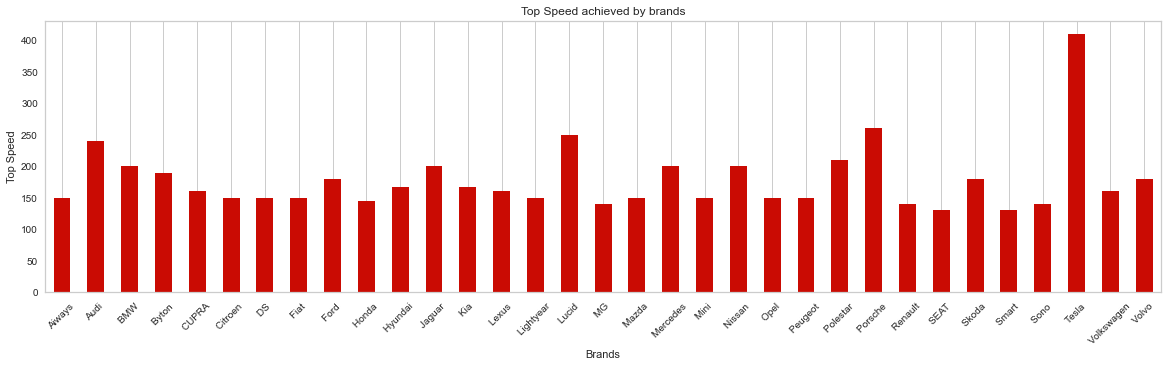

In [15]:
ax=plt.figure(figsize=(20,5))
dt['TopSpeed_KmH'].plot(kind='bar',color='r')
plt.grid(axis='y')
plt.title('Top Speed achieved by brands')
plt.xlabel('Brands')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)

*Tesla, Porsche and Lucid produce the fastest cars while SEAT and Smart the slowest*

**Range a car can achieve**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32, 0, 'Volvo ')])

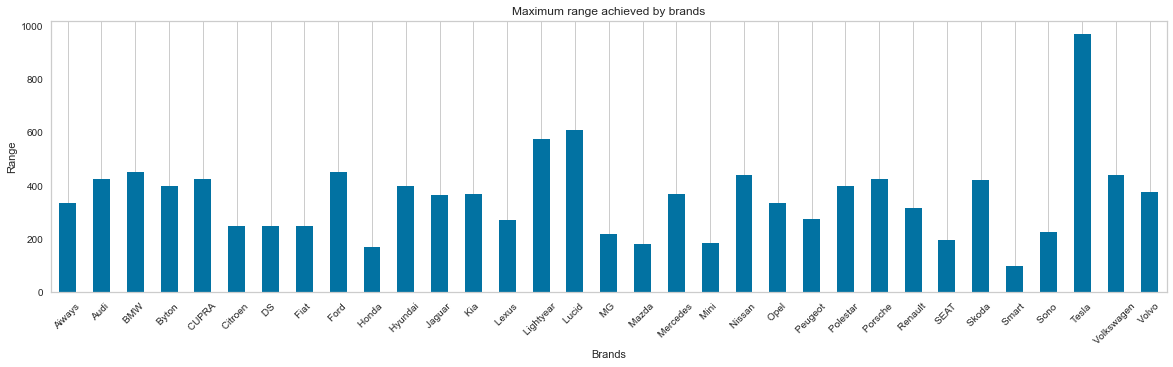

In [16]:
ax=plt.figure(figsize=(20,5))
dt['Range_Km'].plot(kind='bar',color='b')
plt.grid(axis='y')
plt.title('Maximum range achieved by brands')
plt.xlabel('Brands')
plt.ylabel('Range')
plt.xticks(rotation=45)

*Tesla, Lucid and Lightyear have the highest range, i.e., they can cover more distance in one charge while Smart has the lowest range*

**Car Efficiency**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32, 0, 'Volvo ')])

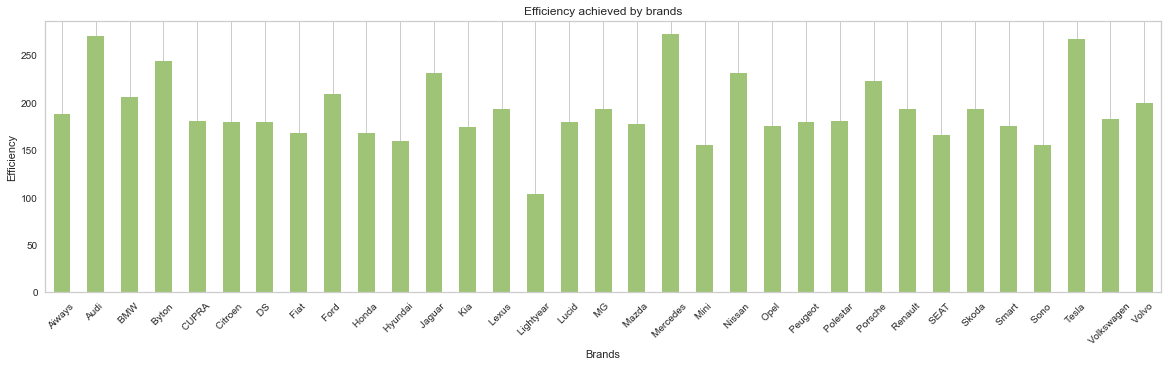

In [17]:
ax=plt.figure(figsize=(20,5))
dt['Efficiency_WhKm'].plot(kind='bar',color='g')
plt.grid(axis='y')
plt.title('Efficiency achieved by brands')
plt.xlabel('Brands')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

*Mercedes, Audi and Tesla are the most efficient and Lightyear the least*

**Number of seats in each car**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32, 0, 'Volvo ')])

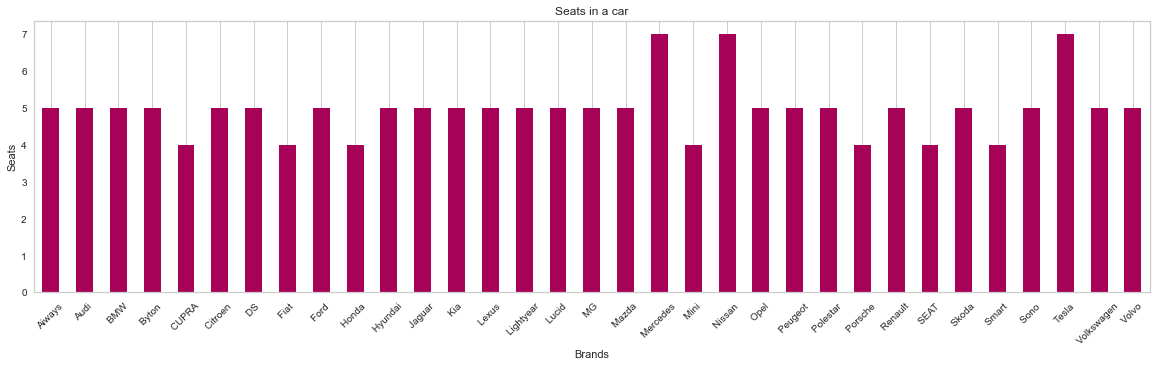

In [18]:
ax=plt.figure(figsize=(20,5))
dt['Seats'].plot(kind='bar',color='m')
plt.grid(axis='y')
plt.title('Seats in a car')
plt.xlabel('Brands')
plt.ylabel('Seats')
plt.xticks(rotation=45)

*Mercedes, Nissan and Tesla have the highest number of seats*

**Price of cars**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Aiways '),
  Text(1, 0, 'Audi '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Byton '),
  Text(4, 0, 'CUPRA '),
  Text(5, 0, 'Citroen '),
  Text(6, 0, 'DS '),
  Text(7, 0, 'Fiat '),
  Text(8, 0, 'Ford '),
  Text(9, 0, 'Honda '),
  Text(10, 0, 'Hyundai '),
  Text(11, 0, 'Jaguar '),
  Text(12, 0, 'Kia '),
  Text(13, 0, 'Lexus '),
  Text(14, 0, 'Lightyear '),
  Text(15, 0, 'Lucid '),
  Text(16, 0, 'MG '),
  Text(17, 0, 'Mazda '),
  Text(18, 0, 'Mercedes '),
  Text(19, 0, 'Mini '),
  Text(20, 0, 'Nissan '),
  Text(21, 0, 'Opel '),
  Text(22, 0, 'Peugeot '),
  Text(23, 0, 'Polestar '),
  Text(24, 0, 'Porsche '),
  Text(25, 0, 'Renault '),
  Text(26, 0, 'SEAT '),
  Text(27, 0, 'Skoda '),
  Text(28, 0, 'Smart '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Tesla '),
  Text(31, 0, 'Volkswagen '),
  Text(32, 0, 'Volvo ')])

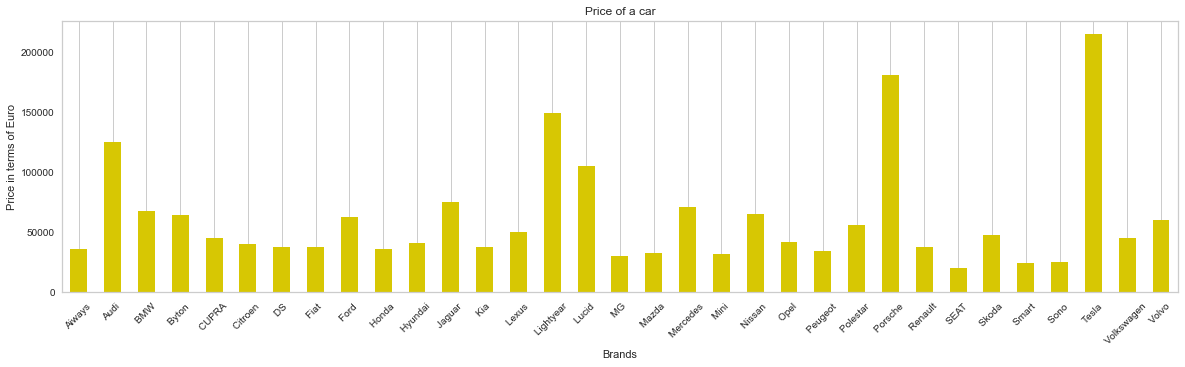

In [19]:
ax=plt.figure(figsize=(20,5))
dt['PriceEuro'].plot(kind='bar',color='y')
plt.grid(axis='y')
plt.title('Price of a car')
plt.xlabel('Brands')
plt.ylabel('Price in terms of Euro')
plt.xticks(rotation=45)

*Tesla, Porsche and Lightyear are the most expensive and SEAT the least*

**Type of plug used for charging**

In [20]:
df['PlugType'].value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

Text(0.5, 1.0, 'Plug Types')

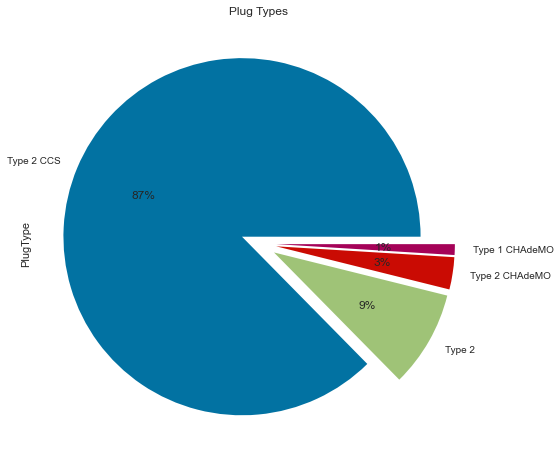

In [21]:
df['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Types')

*Most companies use Type 2 CCS plug while Type 1 CHAdeMO is the least used*

**Cars and their Body Style**

In [22]:
df['BodyStyle'].value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

Text(0.5, 1.0, 'Body Style of Cars')

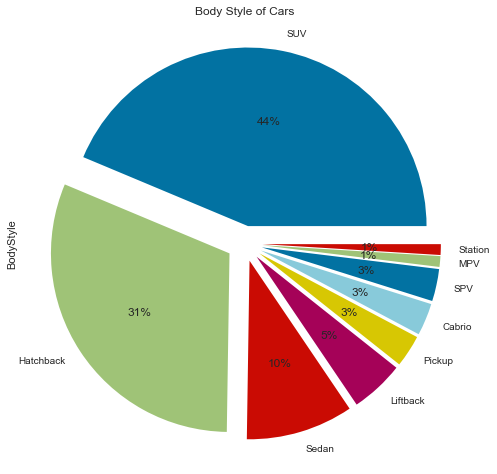

In [23]:
df['BodyStyle'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Body Style of Cars')

*Most cars are either SUV or Hatchback*

**Segment in which the cars fall under**

In [24]:
df['Segment'].value_counts()

C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Segments')

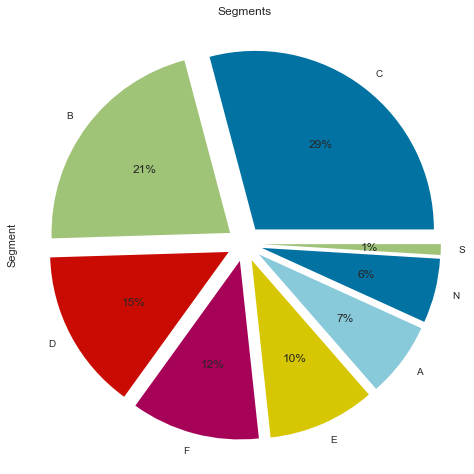

In [25]:
df['Segment'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title('Segments')

*Most cars are either C or B type*

**Number of Seats**

In [26]:
df['Seats'].value_counts()

5    71
4    21
7     6
6     3
2     2
Name: Seats, dtype: int64

Text(0.5, 1.0, 'Seats')

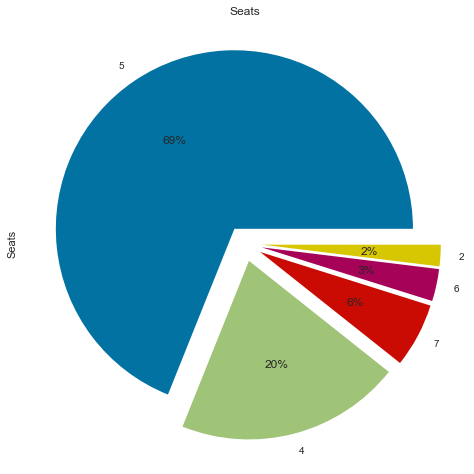

In [27]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1,0.1))
plt.title('Seats')

*Majority of cars have 5 seats*

In [28]:
df['PowerTrain'].value_counts()

AWD    41
FWD    37
RWD    25
Name: PowerTrain, dtype: int64

**Regression for dataset "df"**

**Putting independent variables as x and dependent variable as y**

In [29]:
df['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0,1,2],inplace=True)
x=df[['AccelSec','Range_Km','TopSpeed_KmH','Efficiency_WhKm','RapidCharge','PowerTrain']]
y=df['PriceEuro']

**Finding out the linear regression using OLS method**

In [30]:
x=sm.add_constant(x)
results=sm.OLS(y,x)

**Fitting the model and summarizing**

In [31]:
model=results.fit()
model.params

const             -95763.0312
AccelSec            1538.7358
Range_Km              38.6413
TopSpeed_KmH         570.8864
Efficiency_WhKm      112.0050
RapidCharge        -2827.5602
PowerTrain          5458.2534
dtype: float64

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              PriceEuro   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     41.34
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.60e-24
Time:                        10:08:12   Log-Likelihood:                -1155.0
No. Observations:                 103   AIC:                             2324.
Df Residuals:                      96   BIC:                             2343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.576e+04   3.04e+04     -3.148      0.002   -1.56e+05   -3.54e+04
AccelSec         1538.7358   1189.961      1.293      0.199    -823.317    3900.789
Range_Km           38.6413     23.362      1.654      0.101      -7.732      85.015
TopSpeed_KmH      570.8864     86.671      6.587      0.000     398.845     742.927
Efficiency_WhKm   112.0050     70.227      1.595      0.114     -27.395     251.405
RapidCharge     -2827.5602   1.09e+04     -0.259      0.796   -2.45e+04    1.88e+04
PowerTrain       5458.2534   2954.494      1.847      0.068    -406.371    1.13e+04
==============================================================================
Omnibus:                       84.153   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.603
Skew:                           2.620   Prob(JB):                    7.44e-158
Kurtosis:                      14.881   Cond. No.                     7.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=365)

In [34]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)

**Finding out the R-squared value**

In [35]:
r2=(r2_score(y_test,pred))
r2*100

78.56505811253686

*Around 78% of the dependent variable has been explained by the independent variables*

**Principal Components Analysis**

*Separating out the features*

In [43]:
features=['AccelSec','TopSpeed_KmH','Range_Km','Efficiency_WhKm','RapidCharge','PowerTrain','Seats','PriceEuro']
x=df.loc[:,features].values
x=StandardScaler().fit_transform(x)

In [44]:
pca=PCA(n_components=8)
t=pca.fit_transform(x)
data=pd.DataFrame(t,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.5113,0.2120,-1.0143,-0.9438,0.4121,-0.8232,0.3279,-0.3689
1,-1.7406,-0.5828,-0.6710,0.6083,0.3941,0.1555,-0.3973,-0.3224
2,1.2930,0.0209,-0.3737,-0.7301,-0.0892,-0.6444,0.2832,-0.0881
3,0.0213,-0.1154,-0.0850,1.5579,0.1865,0.2337,-0.4378,0.1833
4,-2.3280,0.2449,-0.7962,0.5904,-0.7448,0.2406,-0.5019,-0.1635
...,...,...,...,...,...,...,...,...
98,-0.3383,-0.4627,-0.0185,0.1724,-0.1474,0.0289,0.1420,0.1329
99,2.2795,0.2302,1.6805,0.3698,-1.0874,0.1321,-0.3490,0.1014
100,0.8151,-0.1643,0.1789,-0.7220,-0.4616,-0.4929,0.0801,-0.2633
101,1.6176,-0.0897,1.0125,0.0003,-0.7315,-0.2048,0.2896,-0.0988


In [45]:
df_8=data.iloc[:,:8]
df_8.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.5113,0.2120,-1.0143,-0.9438,0.4121,-0.8232,0.3279,-0.3689
1,-1.7406,-0.5828,-0.6710,0.6083,0.3941,0.1555,-0.3973,-0.3224
2,1.2930,0.0209,-0.3737,-0.7301,-0.0892,-0.6444,0.2832,-0.0881


*Correlation coefficient between original variables and principal components*

In [48]:
loadings=pca.components_
num_pc=pca.n_features_
pc_list=["PC"+str(i) for i in list(range(1,num_pc+1))]
loadings_df=pd.DataFrame.from_dict(dict(zip(pc_list,loadings)))
loadings_df['variable']=df_8.columns.values
loadings_df=loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,
PC1,-0.4261,-0.0332,0.2239,-0.1880,0.3019,0.6450,0.0035,-0.4741
PC2,0.4372,0.2682,-0.0924,0.0305,0.1930,-0.2701,-0.3266,-0.7145
PC3,0.4135,0.0166,-0.1924,0.2019,0.4708,0.1947,0.7005,0.0262
PC4,0.2666,-0.0751,0.7460,0.4668,-0.3301,0.1125,0.1099,-0.1235
PC5,0.2493,-0.5371,-0.4792,0.0780,-0.4624,0.3823,-0.0758,-0.2186
PC6,0.3553,-0.0082,0.2481,-0.8312,-0.2319,-0.0092,0.2577,-0.0302
PC7,0.1760,-0.7124,0.2375,-0.0861,0.5109,-0.1609,-0.3009,0.1422
PC8,0.4072,0.3534,0.0147,-0.0254,0.1113,0.5369,-0.4773,0.4241


*Correlation matrix for loadings*

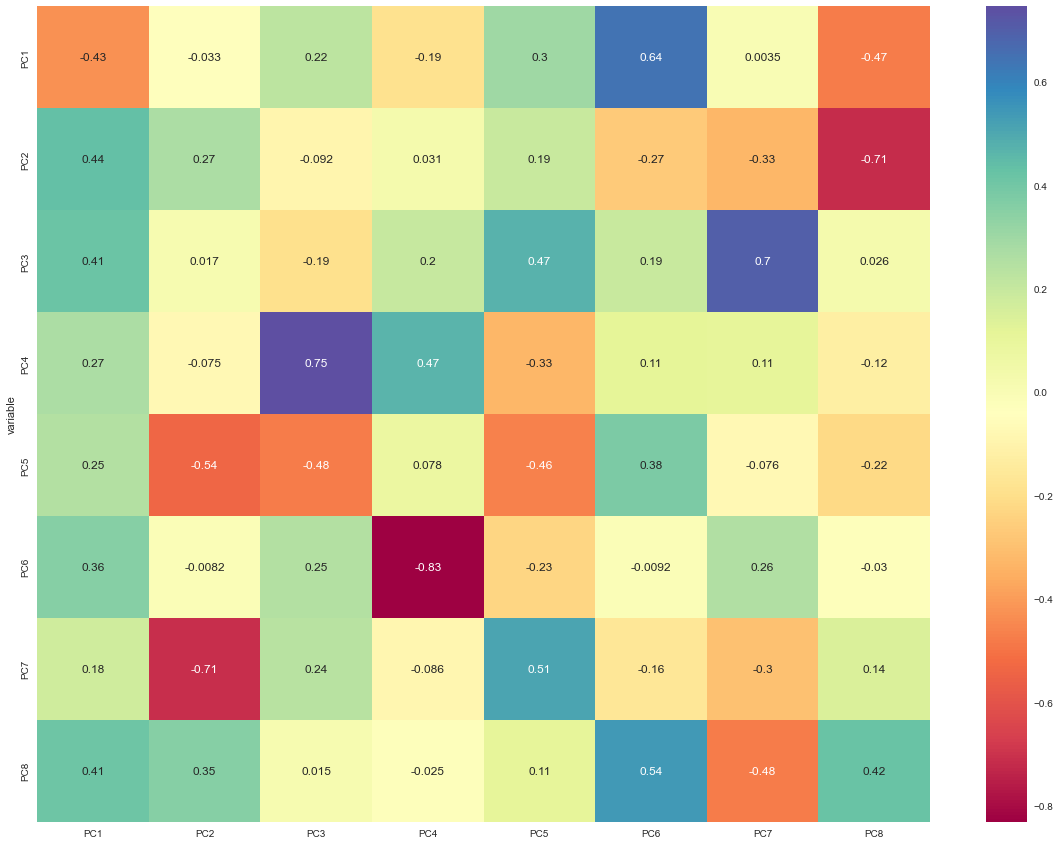

In [49]:
plt.rcParams['figure.figsize']=(20,15)
ax=sns.heatmap(loadings_df,annot=True,cmap='Spectral')
plt.show()

In [52]:
pca.explained_variance_ratio_

array([0.51387, 0.1601 , 0.11593, 0.06881, 0.06514, 0.03524, 0.02893,
       0.01197])

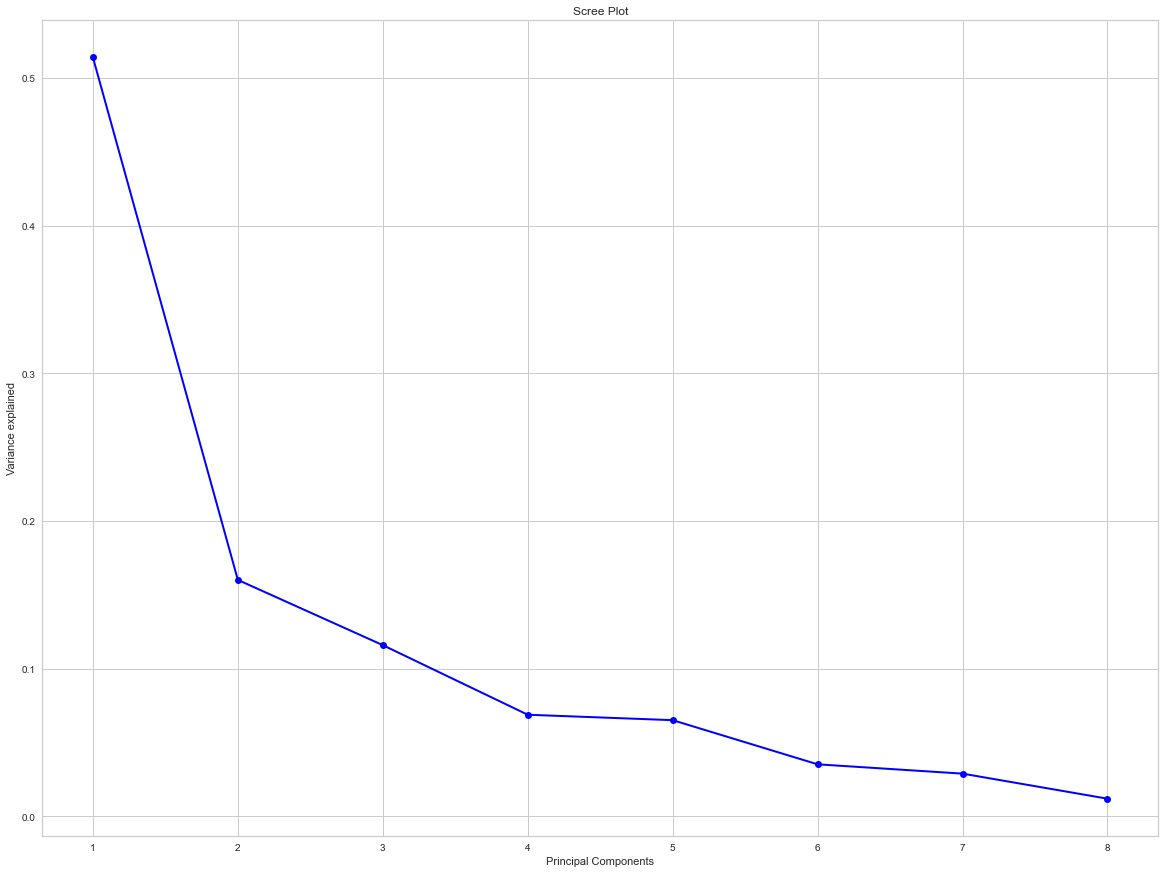

In [53]:
PC_values=np.arange(pca.n_components_)+1
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance explained')
plt.show()

**KMeans Clustering**

*Fitting the data to the visualizer*

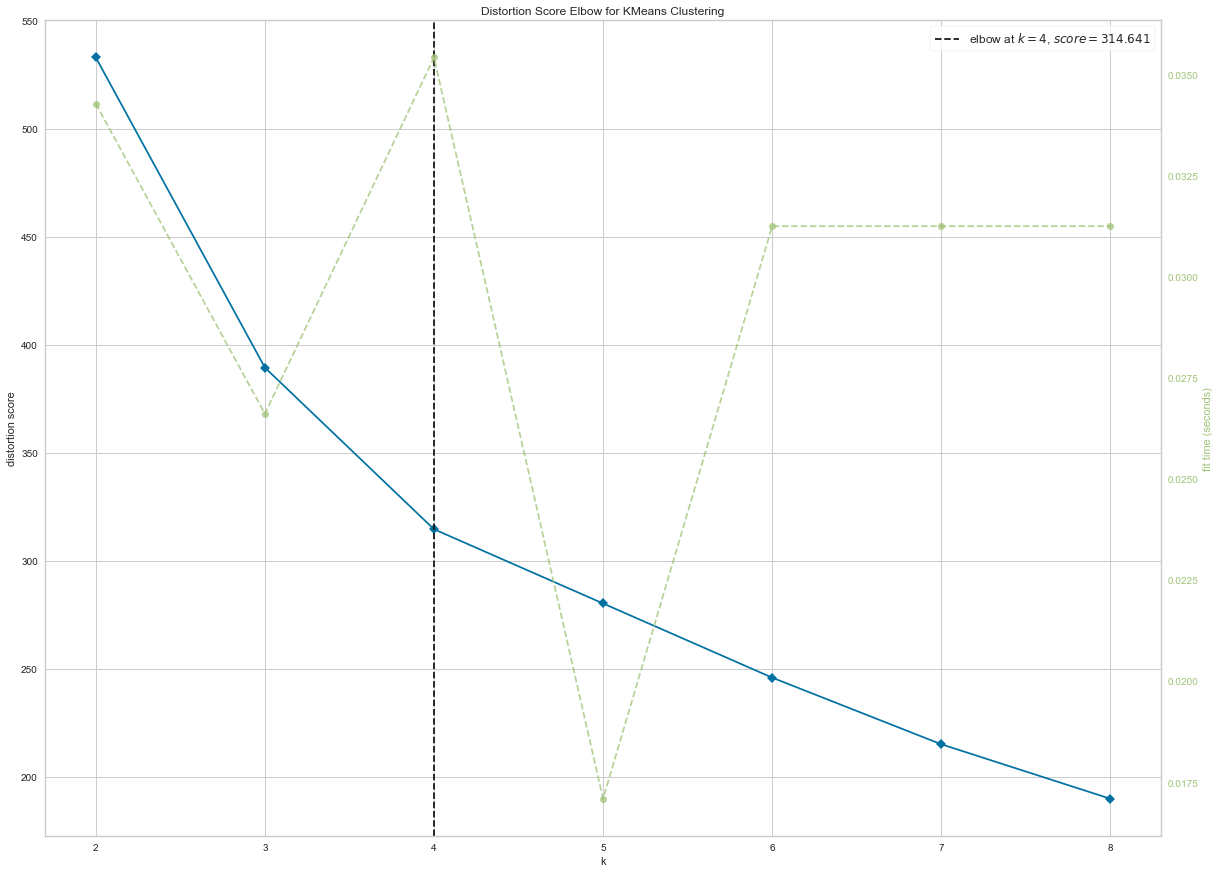

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
model=KMeans(random_state=40)
visualizer=KElbowVisualizer(model,k=(2,9),metric='distortion',timings=True)
visualizer.fit(t)
visualizer.show()

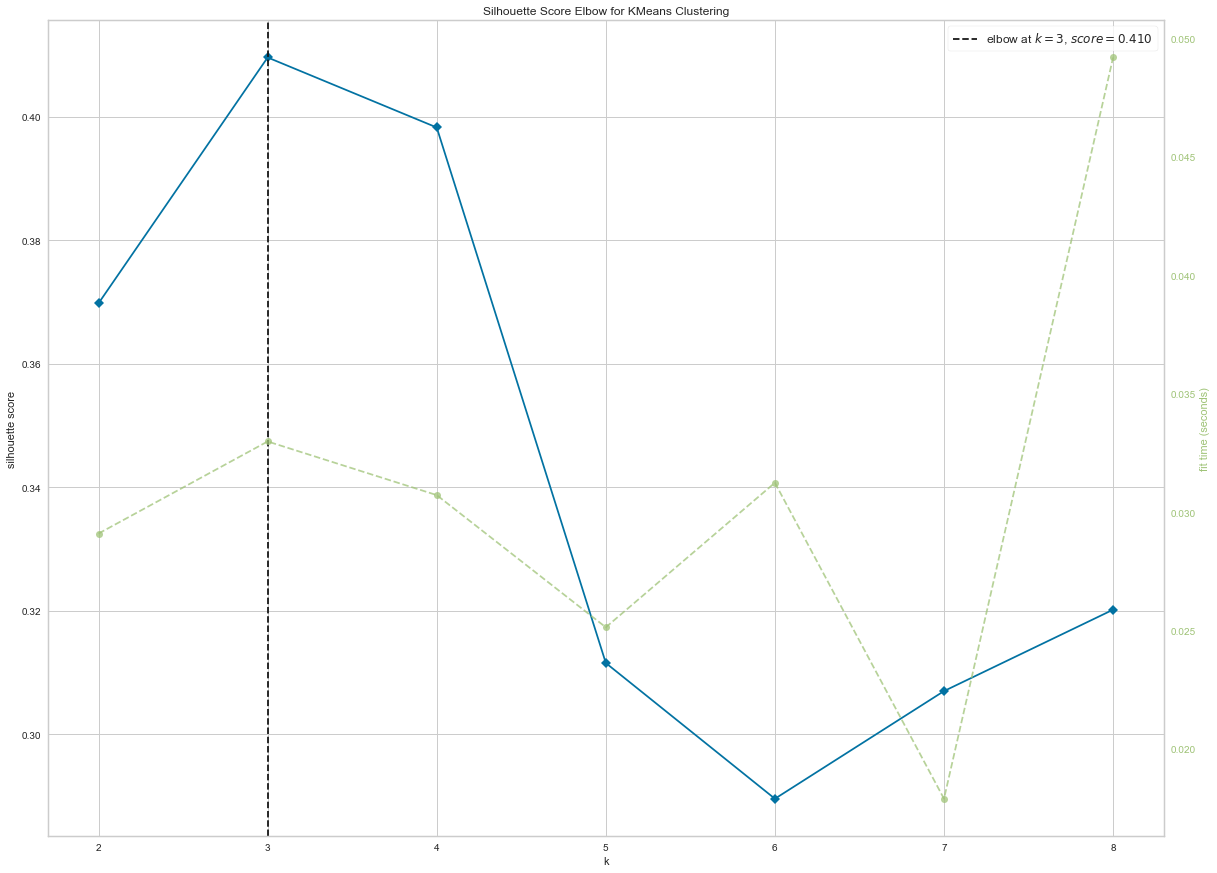

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [55]:
model=KMeans(random_state=40)
visualizer=KElbowVisualizer(model,k=(2,9),metric='silhouette',timings=True)
visualizer.fit(t)
visualizer.show()

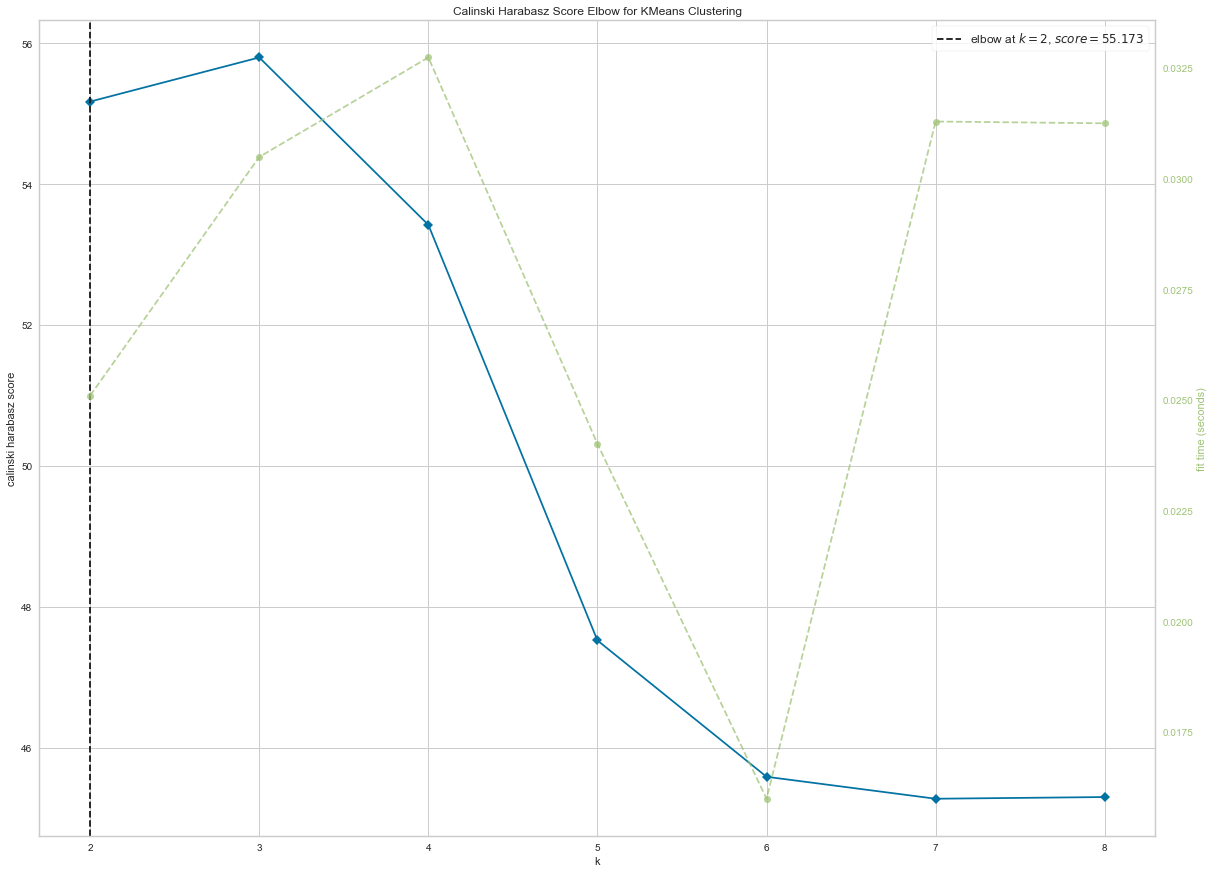

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [56]:
model=KMeans(random_state=40)
visualizer=KElbowVisualizer(model,k=(2,9),metric='calinski_harabasz',timings=True)
visualizer.fit(t)
visualizer.show()

*K-means clustering*

In [58]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0).fit(t)
df['cluster_num']=kmeans.labels_
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,cluster_num
0,Tesla,Model 3 Long Range Dual Motor,4.6000,233,450,161,940,1,2,Type 2 CCS,Sedan,D,5,55480,2
1,Volkswagen,ID.3 Pure,10.0000,160,270,167,250,1,0,Type 2 CCS,Hatchback,C,5,30000,3
2,Polestar,2,4.7000,210,400,181,620,1,2,Type 2 CCS,Liftback,D,5,56440,2
3,BMW,iX3,6.8000,180,360,206,560,1,0,Type 2 CCS,SUV,D,5,68040,3
4,Honda,e,9.5000,145,170,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997,3


*Labels assigned for each data point*

In [59]:
kmeans.labels_

array([2, 3, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2,
       3, 1, 1, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3,
       3, 3, 3, 1, 1, 3, 2, 1, 3, 3, 2, 3, 3, 0, 3, 1, 3, 2, 3, 2, 3, 1,
       3, 2, 0, 2, 3, 2, 1, 2, 3, 3, 2, 0, 2, 1, 3, 2, 0, 3, 2, 3, 2, 2,
       2, 3, 2, 0, 3, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2])

*Within cluster sum of squares*

In [60]:
kmeans.inertia_

314.6407273029633

*Number of iterations that k-means algorithm run to get a minimum within cluster sum of squares*

In [61]:
kmeans.n_iter_

9

*Location of the centroids on each cluster*

In [62]:
kmeans.cluster_centers_

array([[-4.53778,  3.04569,  1.96775, -0.19021,  1.06688, -0.47723,
         0.07771,  0.09266],
       [ 3.01658,  1.57593, -0.62345, -0.33835,  0.16047,  0.2831 ,
        -0.26808,  0.02962],
       [ 1.51438, -0.44143,  0.74095, -0.17617, -0.15842, -0.19705,
         0.16547,  0.02446],
       [-1.0992 , -0.37192, -0.46048,  0.19041, -0.04271,  0.09268,
        -0.04184, -0.02867]])

*Size of clusters*

In [63]:
Counter(kmeans.labels_)

Counter({2: 31, 3: 55, 1: 12, 0: 5})

**Visualizing clusters**

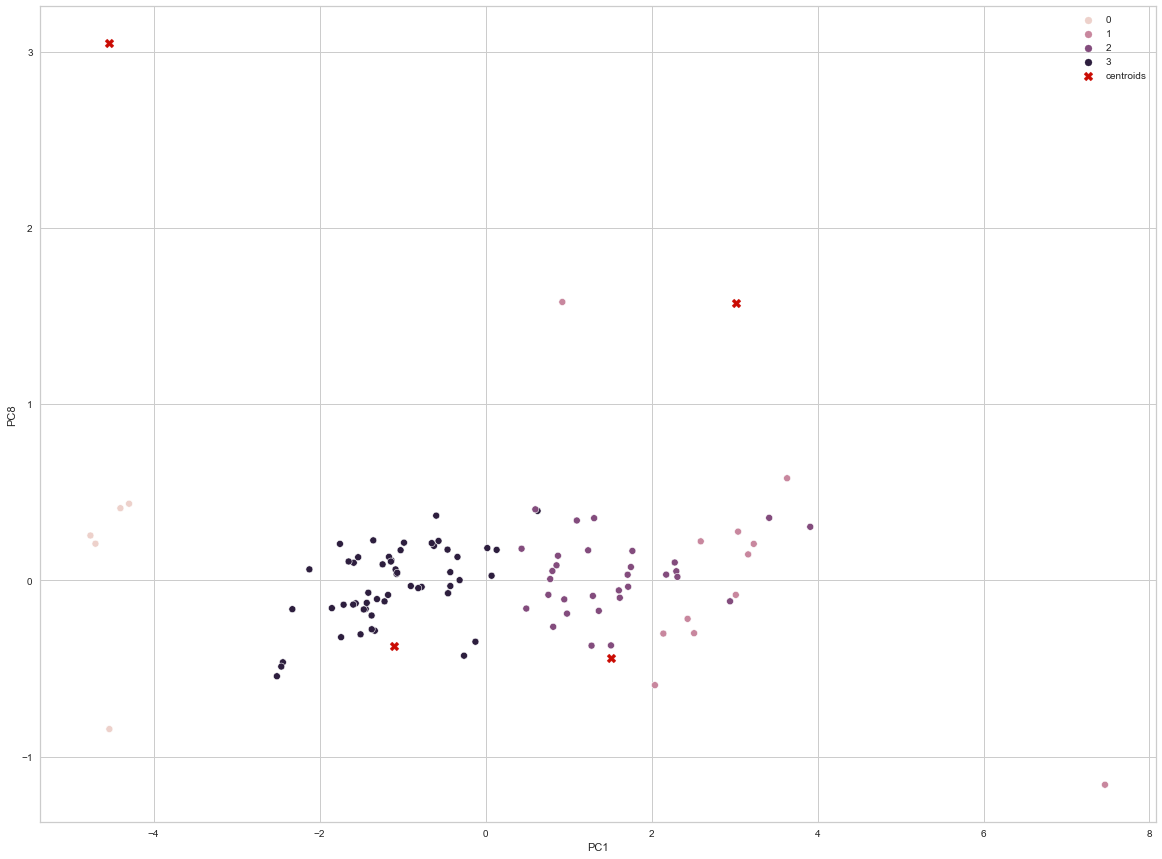

In [64]:
sns.scatterplot(data=data,x="PC1",y="PC8",hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker="X",c="r",s=80,label="centroids")
plt.legend()
plt.show()

**Regression for dataset named "data"**

In [65]:
x=data[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]
y=df['PriceEuro']

In [69]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4,random_state=101)
lm=LinearRegression().fit(x_train,y_train)

In [70]:
lm.intercept_

55811.56310679612

In [71]:
lm.coef_

array([ 13833.30074,  12004.71042,    500.97356,   -862.33778,
         3779.65909,  18239.36926, -16214.06675,  14406.20473])

In [72]:
x_train.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], dtype='object')

In [76]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coeff'])
coeff_df

,Coeff
PC1,13833.3007
PC2,12004.7104
PC3,500.9736
PC4,-862.3378
PC5,3779.6591
PC6,18239.3693
PC7,-16214.0667
PC8,14406.2047


In [74]:
predictions=lm.predict(x_test)
predictions

array([ 45000.,  30000.,  62900.,  38987.,  36837.,  65620.,  34900.,
        40000.,  47500.,  31184.,  31900.,  45000.,  24534., 180781.,
        79445.,  38105.,  53500.,  34459.,  45000., 215000.,  58620.,
        68040.,  70631.,  24790., 149000., 102945., 148301.,  40000.,
        56440.,  65000.,  36837.,  37500.,  33971., 125000.,  33000.,
        35000.,  37900.,  60437.,  29146.,  33246.,  67358.,  37237.])

In [75]:
y_test

37     45000
1      30000
69     62900
80     38987
92     36837
61     65620
85     34900
53     40000
88     47500
32     31184
6      31900
71     45000
43     24534
16    180781
50     79445
31     38105
97     53500
14     34459
25     45000
51    215000
21     58620
3      68040
84     70631
57     24790
48    149000
47    102945
79    148301
58     40000
2      56440
13     65000
45     36837
89     37500
41     33971
23    125000
26     33000
22     35000
94     37900
27     60437
20     29146
66     33246
30     67358
35     37237
Name: PriceEuro, dtype: int64

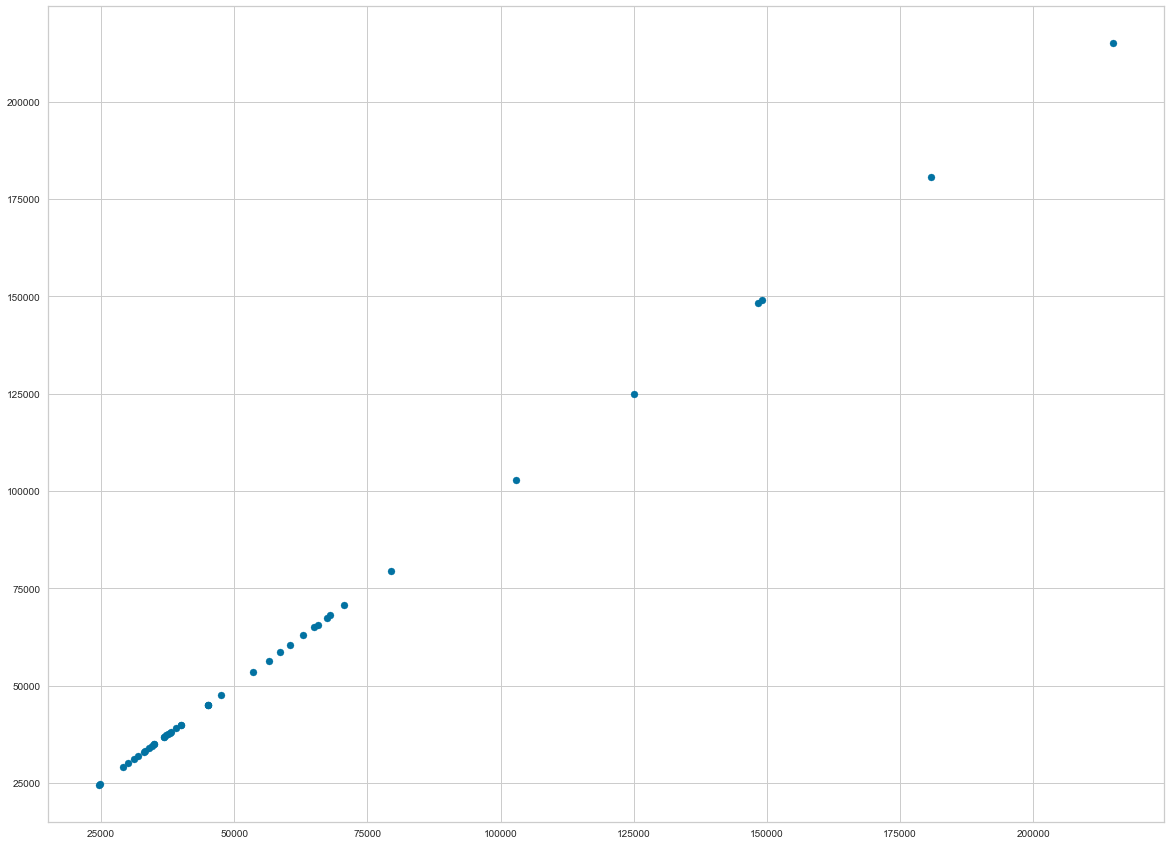

In [77]:
plt.scatter(y_test,predictions)

*Residual histogram plot*

C:\Users\HP\Documents\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PriceEuro', ylabel='Density'>

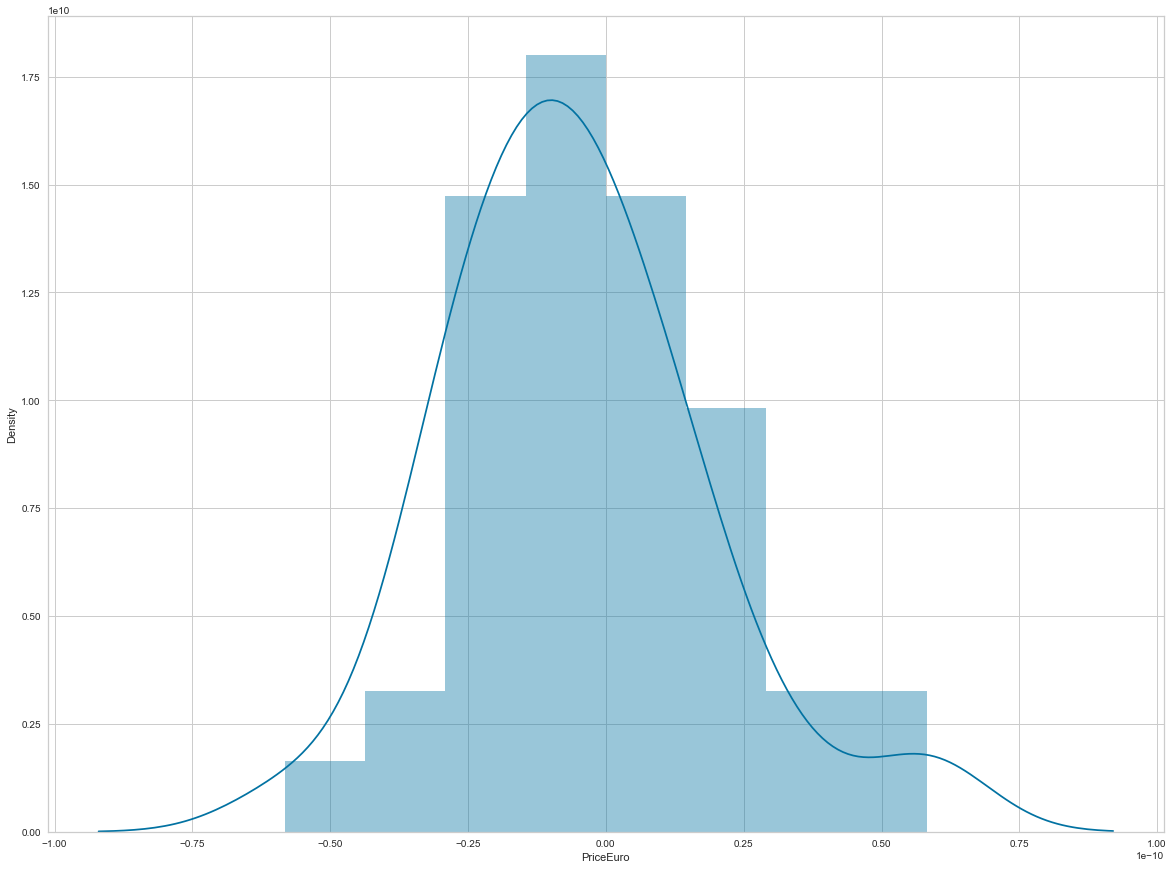

In [78]:
sns.distplot((y_test-predictions))

In [79]:
print('Mean absolute error (MAE):',metrics.mean_absolute_error(y_test,predictions))
print('Mean squared error (MSE):',metrics.mean_squared_error(y_test,predictions))
print('Root mean squared error (RMSE):',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 1.8536368207562536e-11
Mean squared error (MSE): 5.835956169326504e-22
Root mean squared error (RMSE): 2.4157723753132255e-11
